# Chapter 2 Extra Laboratory

##### You can find this practice [here](http://openintrostat.github.io/oilabs-tidy/02_intro_to_data/intro_to_data.html#More_Practice). 

Some define statistics as the field that focuses on turning information into knowledge. The first step in that process is to summarize and describe the raw information – the data. In this lab we explore flights, specifically a random sample of domestic flights that departed from the three major New York City airports in 2013. We will generate simple graphical and numerical summaries of data on these flights and explore delay times. Since this is a large data set, along the way you’ll also learn the indispensable skills of data processing and subsetting.

## The Data

The [Bureau of Transportation Statistics](http://www.rita.dot.gov/bts/about/) (BTS) is a statistical agency that is a part of the Research and Innovative Technology Administration (RITA). As its name implies, BTS collects and makes transportation data available, such as the flights data we will be working with in this lab.

First, we’ll view the `nycflights` data frame.

In [128]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

sns.set_theme()

Let's import the dataframe using pandas.

In [129]:
nycflights_path = Path("../datasets/nycflights.csv")
nycflights_df = pd.read_csv(nycflights_path)
display(nycflights_df)

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
0      2013      6   30       940         15      1216         -4      VX   
1      2013      5    7      1657         -3      2104         10      DL   
2      2013     12    8       859         -1      1238         11      DL   
3      2013      5   14      1841         -4      2122        -34      DL   
4      2013      7   21      1102         -3      1230         -8      9E   
...     ...    ...  ...       ...        ...       ...        ...     ...   
32730  2013     10    8       752         -8       921        -28      9E   
32731  2013      7    7       812         -3      1043          8      DL   
32732  2013      9    3      1057         -1      1319        -19      UA   
32733  2013     10   15       844         56      1045         60      B6   
32734  2013      3   28      1813         -3      1942        -23      UA   

      tailnum  flight origin dest  air_time  distance  hour  minute  
0      N626VA     407    JFK  LAX       313      2475     9      40  
1      N3760C     329    JFK  SJU       216      1598    16      57  
2      N712TW     422    JFK  LAX       376      2475     8      59  
3      N914DL    2391    JFK  TPA       135      1005    18      41  
4      N823AY    3652    LGA  ORF        50       296    11       2  
...       ...     ...    ...  ...       ...       ...   ...     ...  
32730  N8505Q    3611    JFK  PIT        63       340     7      52  
32731  N6713Y    1429    JFK  LAS       286      2248     8      12  
32732  N77871    1545    EWR  IAH       180      1400    10      57  
32733  N258JB    1273    JFK  CHS        93       636     8      44  
32734  N36272    1053    EWR  CLE        59       404    18      13  

[32735 rows x 16 columns]

One of the variables refers to the carrier (i.e. airline) of the flight, which is coded according to the following system.

`carrier`: Two letter carrier abbreviation.

* `9E`: Endeavor Air Inc.
* `AA`: American Airlines Inc.
* `AS`: Alaska Airlines Inc.
* `B6`: JetBlue Airways
* `DL`: Delta Air Lines Inc.
* `EV`: ExpressJet Airlines Inc.
* `F9`: Frontier Airlines Inc.
* `FL`: AirTran Airways Corporation
* `HA`: Hawaiian Airlines Inc.
* `MQ`: Envoy Air
* `OO`: SkyWest Airlines Inc.
* `UA`: United Air Lines Inc.
* `US`: US Airways Inc.
* `VX`: Virgin America
* `WN`: Southwest Airlines Co.
* `YV`: Mesa Airlines Inc.

The `nycflights` data frame is a massive trove of information. Let’s think about some questions we might want to answer with these data:

* How delayed were flights that were headed to Los Angeles?
* How do departure delays vary by month?
* Which of the three major NYC airports has the best on time percentage for departing flights?

## Analysis

Let’s start by examining the distribution of departure delays of all flights with a histogram.

count    32735.000000
mean        12.705147
std         40.407426
min        -21.000000
25%         -5.000000
50%         -2.000000
75%         11.000000
max       1301.000000
Name: dep_delay, dtype: float64


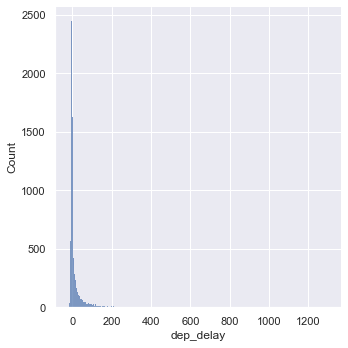

In [130]:
print(nycflights_df["dep_delay"].describe())
ax = sns.displot(data=nycflights_df, x="dep_delay")

Histograms are generally a very good way to see the shape of a single distribution of numerical data, but that shape can change depending on how the data is split between the different bins.

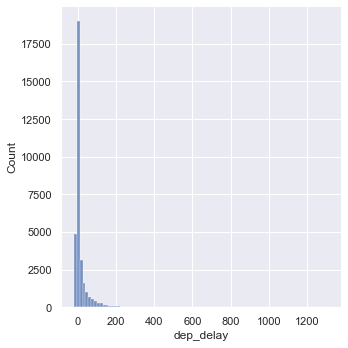

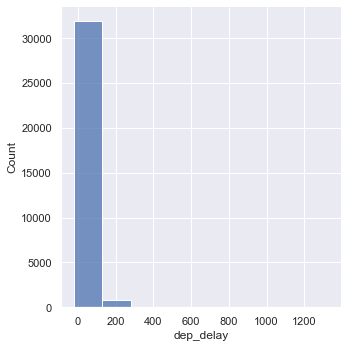

In [131]:
ax = sns.displot(data=nycflights_df, x="dep_delay", binwidth=15)
ax = sns.displot(data=nycflights_df, x="dep_delay", binwidth=150)

### Exercise 1 - Look carefully at these three histograms. How do they compare? Are features revealed in one that are obscured in another?

The less the binwidth, the more granular the histogram results. However, too much granularity will make us confused and therefore using a larger binwidth will collapse closer observations to the same bin, but it is overall more clear.

If you want to visualize only delays of flights headed to Los Angeles, you need to first `filter` the data for flights with that destination (`dest == "LAX"`) and then make a histogram of the departure delays of only those flights.

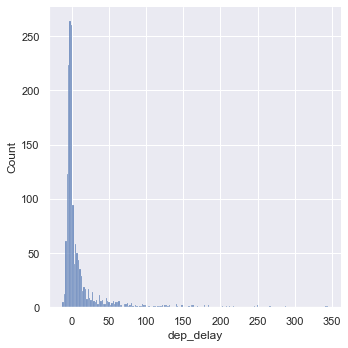

In [132]:
lax_flights = nycflights_df[nycflights_df["dest"] == "LAX"]
ax = sns.displot(x="dep_delay", data=lax_flights)

You can also obtain numerical summaries for these flights.

In [133]:
lax_flights["dep_delay"].describe()

count    1583.000000
mean        9.782059
std        33.486094
min       -13.000000
25%        -4.000000
50%        -1.000000
75%         7.000000
max       345.000000
Name: dep_delay, dtype: float64

You can also filter based on multiple criteria. Suppose you are interested in flights headed to San Francisco (SFO) in February.

In [134]:
sfo_feb_flights = nycflights_df[(nycflights_df["dest"] == "SFO") & (nycflights_df["month"] == 2)]
display(sfo_feb_flights)

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
535    2013      2   18      1527         57      1903         48      DL   
813    2013      2    3       613         14      1008         38      UA   
1259   2013      2   15       955         -5      1313        -28      DL   
1527   2013      2   18      1928         15      2239         -6      UA   
1873   2013      2   24      1340          2      1644        -21      UA   
...     ...    ...  ...       ...        ...       ...        ...     ...   
29655  2013      2   21      1745          0      2106        -14      AA   
29790  2013      2    3      1055         -5      1405        -20      UA   
29806  2013      2   25      1855          0      2220        -20      VX   
30563  2013      2    6      1654         -6      2015        -34      DL   
31510  2013      2   25      1023         -7      1336        -39      VX   

      tailnum  flight origin dest  air_time  distance  hour  minute  
535    N711ZX    1322    JFK  SFO       358      2586    15      27  
813    N502UA     691    JFK  SFO       367      2586     6      13  
1259   N717TW    1765    JFK  SFO       338      2586     9      55  
1527   N24212    1214    EWR  SFO       353      2565    19      28  
1873   N76269    1111    EWR  SFO       341      2565    13      40  
...       ...     ...    ...  ...       ...       ...   ...     ...  
29655  N329AA     177    JFK  SFO       348      2586    17      45  
29790  N510UA     642    JFK  SFO       351      2586    10      55  
29806  N624VA      29    JFK  SFO       367      2586    18      55  
30563  N624AG      31    JFK  SFO       355      2586    16      54  
31510  N845VA      23    JFK  SFO       359      2586    10      23  

[68 rows x 16 columns]

### Exercise 2 - Create a new data frame that includes flights headed to SFO in February, and save this data frame as `sfo_feb_flights`. How many flights meet these criteria?

See above, 68 flights (observations) meet this criteria.

### Exercise 3 - Describe the distribution of the __arrival__ delays of these flights using a histogram and appropriate summary statistics. __Hint__: The summary statistics you use should depend on the shape of the distribution.

count    32735.000000
mean        12.705147
std         40.407426
min        -21.000000
25%         -5.000000
50%         -2.000000
75%         11.000000
max       1301.000000
Name: dep_delay, dtype: float64


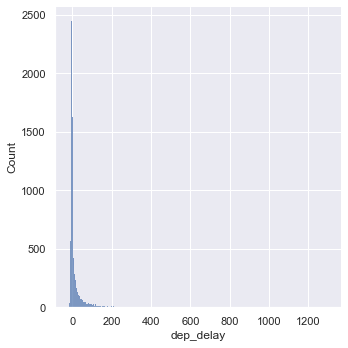

In [135]:
print(nycflights_df["dep_delay"].describe())
ax = sns.displot(x="dep_delay", data=nycflights_df)

Another useful technique is quickly calculating summary statistics for various groups in your data frame. For example, we can modify the above command using the `groupby` method to get the same summary stats for each origin airport.

In [136]:
sfo_feb_flights.groupby("origin")["dep_delay"].describe()

count       mean        std   min  25%  50%    75%    max
origin                                                           
EWR       8.0   2.500000   6.347103  -3.0 -2.0  0.5   3.75   15.0
JFK      60.0  11.566667  35.257583 -10.0 -5.0 -2.5  10.25  209.0

### Exercise 4 - Calculate the median and interquartile range for `arr_delays` of flights in in the `sfo_feb_flights` data frame, grouped by carrier. Which carrier has the most variable arrival delays?

In [137]:
summarized_by_carrier = sfo_feb_flights.groupby("carrier")["arr_delay"].describe()
print(summarized_by_carrier)
print("Median:")
print(summarized_by_carrier["50%"])
print("IQR:")
print(summarized_by_carrier["75%"] - summarized_by_carrier["25%"])

         count       mean        std   min    25%   50%    75%    max
carrier                                                              
AA        10.0  11.500000  29.470324 -26.0  -2.00   5.0  15.50   76.0
B6         6.0  -6.333333  10.984838 -18.0 -12.50 -10.5  -0.25   11.0
DL        19.0 -13.473684  22.028689 -48.0 -27.50 -15.0  -5.50   48.0
UA        21.0   1.809524  48.326617 -35.0 -20.00 -10.0   2.00  196.0
VX        12.0 -13.750000  40.848111 -66.0 -32.25 -22.5 -11.00   99.0
Median:
carrier
AA     5.0
B6   -10.5
DL   -15.0
UA   -10.0
VX   -22.5
Name: 50%, dtype: float64
IQR:
carrier
AA    17.50
B6    12.25
DL    22.00
UA    22.00
VX    21.25
dtype: float64


## Departure delays by month

Which month would you expect to have the highest average delay departing from an NYC airport? Let's find out with the previous techniques, plus the `orderby` method.

In [138]:
nycflights_df.groupby("month")["dep_delay"].describe().sort_values(by="mean", ascending=False)

count       mean        std   min  25%  50%   75%     max
month                                                            
7      2742.0  20.754559  47.777209 -17.0 -4.0  0.0  22.0   392.0
6      2732.0  20.350293  53.514525 -18.0 -4.0  0.0  21.0   803.0
12     2716.0  17.368189  43.013227 -18.0 -4.0  1.0  21.0   849.0
4      2781.0  14.554477  43.421545 -18.0 -5.0 -2.0  11.0   427.0
3      2869.0  13.517602  40.291106 -20.0 -5.0 -1.0  12.0   393.0
5      2821.0  13.264800  38.254973 -19.0 -5.0 -1.0  14.0   351.0
8      2880.0  12.619097  39.221086 -21.0 -5.0 -1.0  10.0   436.0
2      2286.0  10.687227  33.115879 -20.0 -5.0 -2.0  10.0   319.0
1      2610.0  10.233333  42.386208 -17.0 -5.0 -2.0   7.0  1301.0
9      2681.0   6.872436  35.344786 -21.0 -6.0 -3.0   2.0   473.0
11     2733.0   6.103183  27.633642 -21.0 -5.0 -2.0   5.0   413.0
10     2884.0   5.880374  29.369757 -18.0 -6.0 -3.0   3.0   272.0

### Exercise 5 - Suppose you really dislike departure delays and you want to schedule your travel in a month that minimizes your potential departure delay leaving NYC. One option is to choose the month with the lowest mean departure delay. Another option is to choose the month with the lowest median departure delay. What are the pros and cons of these two choices?

In this case, the lowest mean corresponds to the lowest median, too. The mean is sensitive to outliers, so it might not tell us the real shape of the data, and therefore the real expected value. The median on the contrary is not sensitive to outliers, and therefore it is a more stable measure. The median gives a more clear insight to the shape of the data. The mean is just an artihmetic center of the distribution.

## On time departure rate for NYC airports

Suppose you will be flying out of NYC and want to know which of the three major NYC airports has the best on time departure rate of departing flights. Also supposed that for you, a flight that is delayed for less than 5 minutes is basically “on time”. You consider any flight delayed for 5 minutes of more to be “delayed”.

In order to determine which airport has the best on time departure rate, you can

* first classify each flight as “on time” or “delayed”,
* then group flights by origin airport,
* then calculate on time departure rates for each origin airport,
* and finally arrange the airports in descending order for on time departure percentage.

Let’s start with classifying each flight as “on time” or “delayed” by creating a new variable.

In [139]:
nycflights_df["dep_type"] = nycflights_df["dep_delay"].apply(lambda x: "on time" if x < 5 else "delayed")

We can handle all of the remaining steps in one code chunk.

In [140]:
nycflights_df.groupby(["origin", "dep_type"]) \
             .size() \
             .divide(nycflights_df.shape[0]) \
             .reset_index() \
             .rename(columns={0: "rate"}) \
             .sort_values(by=["rate"], ascending=False) \
             .drop_duplicates(subset="origin")[["origin", "rate"]] \
             .rename(columns={"rate": "on time rate"})


origin  on time rate
3    JFK      0.230884
1    EWR      0.229051
5    LGA      0.223858

In pandas it might seem a little more cumbersome than other libraries, but Python is a multi-purpose language.

### Exercise 6 - If you were selecting an airport simply based on on time departure percentage, which NYC airport would you choose to fly out of?

I would definitely fly from JFK.

We can also visualize the distribution of on on time departure rate across the three airports using a segmented bar plot.

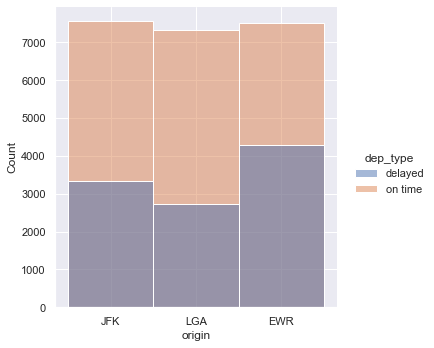

In [141]:
ax = sns.displot(x="origin", data=nycflights_df, hue="dep_type")

### Exercise 7 - Mutate the data frame so that it includes a new variable that contains the average speed, `avg_speed` traveled by the plane for each flight (in mph). __Hint__: Average speed can be calculated as distance divided by number of hours of travel, and note that `air_time` is given in minutes.

In [143]:
nycflights_df["avg_speed"] = nycflights_df["distance"] / (nycflights_df["air_time"] / 60)
nycflights_df["avg_speed"].describe()

count    32735.000000
mean       394.080322
std         60.812709
min         76.800000
25%        357.391304
50%        404.000000
75%        438.823529
max        703.384615
Name: avg_speed, dtype: float64

### Exercise 8 - Make a scatterplot of `avg_speed` vs. `distance`. Describe the relationship between average speed and distance.

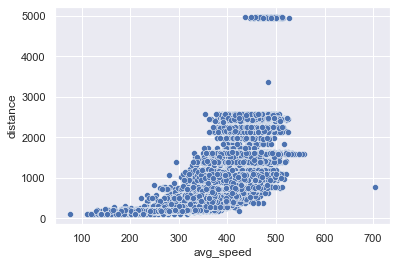

In [144]:
ax = sns.scatterplot(x="avg_speed", y="distance", data=nycflights_df)

### Exercise 9 - Replicate the following plot. 

![replicate](assets/replicate_this.png)

### __Hint__: The data frame plotted only contains flights from American Airlines, Delta Airlines, and United Airlines, and the points are `color`ed by `carrier`. Once you replicate the plot, determine (roughly) what the cutoff point is for departure delays where you can still expect to get to your destination on time.

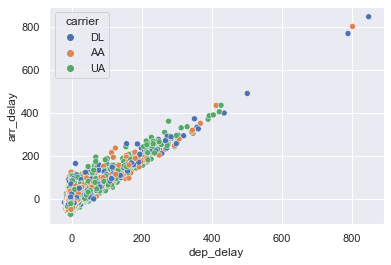

In [145]:
ax = sns.scatterplot(x="dep_delay", y="arr_delay", hue="carrier", data=nycflights_df[nycflights_df["carrier"].isin(["AA", "DL", "UA"])])